# Assignment
## A first glimpse of wind speed statistics
### A solution by P.Lind and P.Lencastre, Oslo, Setembro 2021

In [16]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.pylab as plab

In [17]:
def centeredmoment(dataseries,moment):
    thismean       = np.mean(dataseries)
    centeredseries = dataseries-thismean
    thismoment     = np.sum(centeredseries**moment) / len(dataseries)
    return thismoment

## (1) Write your own routine for computing the first four moments of the data set.

In [18]:
ttwind, xxwind = np.loadtxt('winddata.dat', usecols=(0, 1), unpack=True)

In [19]:
mvec = [2,3,4]
mymean = np.sum(xxwind)/len(xxwind)
momvec = [mymean]
for m in mvec:
    singlemom = centeredmoment(xxwind,m)
    momvec.append(singlemom)

print("First four moments of winddata.dat series are:")
print(momvec)

First four moments of winddata.dat series are:
[0.09819033945642662, 0.0014063915446366625, 3.219116058061687e-05, 5.877283395296137e-06]


### Compare with python routines

In [20]:
themean = np.mean(xxwind)
thestdev = np.std(xxwind)
theskew = scipy.stats.skew(xxwind)
thekurt = scipy.stats.kurtosis(xxwind)

In [21]:
pythonmomvec = [themean,thestdev,theskew,thekurt]
print("First four moments of winddata.dat series (FROM PYTHON) are:")
print(pythonmomvec)

First four moments of winddata.dat series (FROM PYTHON) are:
[0.09819033945642662, 0.03750188721433446, 0.6103476326434055, -0.028579338030887858]


### Correct "mymoments"

In [22]:
#Mean is ok

In [23]:
finalstdev = np.sqrt(momvec[1])
print(finalstdev)

0.03750188721433446


In [24]:
finalskew = momvec[2]/(finalstdev**3)
print(finalskew)

0.6103476326434056


In [25]:
finalkurt = momvec[3]/(finalstdev**4)-3
print(finalkurt)

-0.028579338030886525


## (2) Compute the histograma of the wind speed

One alternative

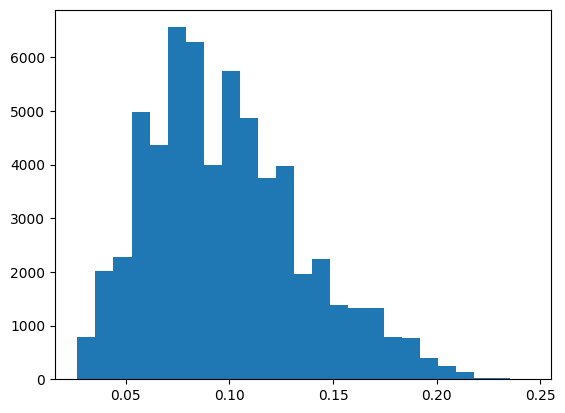

In [26]:
plt.hist(xxwind,bins=25) # arguments are passed to np.histogram
plt.show()

Another alternative

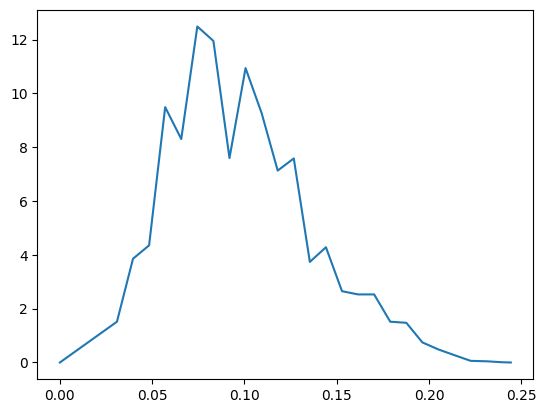

In [27]:
nbins=25
hist, bin_edges = np.histogram(xxwind, bins=nbins, range=None, weights=None, density=True)
bin_mids = np.zeros(len(hist)+2)
new_hist = np.zeros(len(hist)+2)
for ii in range(len(hist)):
    bin_mids[ii+1]=0.5*(bin_edges[ii+1]+bin_edges[ii])
    new_hist[ii+1]=hist[ii]
bin_mids[len(hist)+1]=bin_edges[len(hist)]
new_hist[len(hist)+1]=0.
plt.plot(bin_mids,new_hist)
#print(new_hist)
#print(bin_mids)

## (3) Fit Weibull distribution

Fit the equation
\begin{equation} 
    \label{eq:weibull}
        f_W(v) = {\frac{k}{\lambda} \left(\frac{v}{\lambda}\right)^{k-1}} 
        e^{- \left( \frac{v}{\lambda} \right)^k} \, ,
\end{equation}
where $\lambda$ and $k$ are called the scale and shape parameters.

In [28]:
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

In [29]:
data=np.array([bin_mids, new_hist])
np.savetxt('windhistogram.dat', data)

In [30]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(weib, bin_mids, new_hist)
print(popt)
#plt.plot(bin_mids, weib(bin_mids, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
#loc, scale = scipy.stats.exponweib.fit_loc_scale(xxwind, 1, 1)
#print(scipy.stats.exponweib.fit(data, floc=0, f0=1))
#print(loc, scale)

[1. 1.]


/tmp/ipykernel_65154/1061561295.py:2: RuntimeWarning: invalid value encountered in power
  return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)


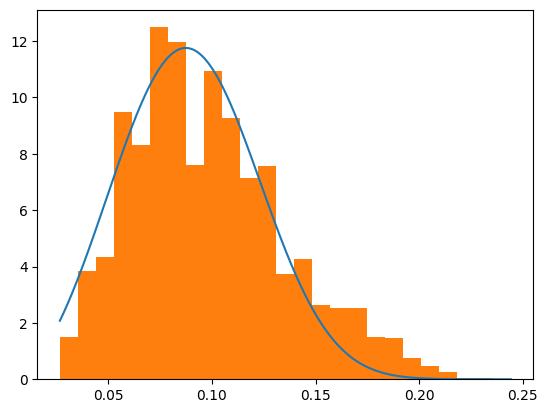

In [33]:
x = np.linspace(xxwind.min(), xxwind.max(), 1000)
plt.plot(x, weib(x, 0.1, 3))
plt.hist(xxwind, bins=25, density=True)
plt.show()